# Image Pre-Processing

## 0. Import libraries

### Standard Libraries

In [ ]:
# STANDARD LIBRARIES
# System and file management
import sys
import os
from tqdm import tqdm
# import shutil # functions of high-level operations on files and collections of files
import glob  # functions to organize files under a specified folder

# Drive
from google.colab import drive
from google.colab import files

# Images
import cv2 # opencv-free library for artificial vision
import PIL # python imaging library
from PIL import Image 

# Pandas and Numpy
import pandas as pd
import numpy as np
from numpy import savetxt
import random
# import regex as re

# sklearn
from sklearn.utils import shuffle

# Visualization tools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

### Activate Drive

In [ ]:
# Mount google drive in google colab
drive.mount('/content/drive')

Mounted at /content/drive


Custom libraries (Python)

In [ ]:
sys.path.insert(0,'/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/notebooks/modules')

In [ ]:
# Availables python functions 
!ls '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/notebooks/modules'

classification.py    image_viz.py	     __pycache__
eda.py		     old		     test.py
files_management.py  performance_checker.py  unet.py


In [ ]:
# CUSTOM LIBRARIES

# File management
import files_management as fm

# Vizualizations
import image_viz as iv
import eda

## 1.Paths

In [ ]:
# Drive paths
GEN_DRIVE = '/content/drive'
DRIVE = '/My Drive' 
PROJECT = '/IRONHACK/PROJECTS/CNN-Leukemia'
  
# Folder containing the original data.
INPUT = '/input'

# Folder containing the notebooks.
NB = '/notebooks'
# Functions
FUNCTION = GEN_DRIVE+DRIVE+PROJECT+NB+'/modules'  

# Folder containing the outputs (arrays/csv/viz/models).
OUTPUT = '/output/'
SUBFOLDER = ['arrays/','csv','viz','models/']
# Arrays
DEST = ['128x128','450x450','validation']

# Training images
# Images are stored in three different folders (fold_0, fold_1, fold_2)
TRAIN = '/training_data/'
FOLDERS = ['fold_0','fold_1','fold_2']
# Diseasedd Cells (ALL)/ Non-Diseased Cells (HEM)
CELLS = ['all', 'hem']

# Valudation data
VALIDATION = '/validation_data/C-NMC_test_prelim_phase_data'

## 2. Image Pre-processing


### 2.1 Exploration

### Input

Loading data (https://www.kaggle.com/andrewmvd/leukemia-classification) stored in Google Drive **input** folder.


![picture](https://drive.google.com/uc?id=1XIhgCHritHcTbR1gCIsUReAXo3S0hkOz)

where:
  - all: Leukemia cells
  - hem: Normal (healty) cells

In [ ]:
# INPUT folder
path_input = GEN_DRIVE+DRIVE+PROJECT+INPUT

Let's make a first exploration of the images with different formats to choose which one can be the most suitable for training the model.

### Reduced DataSet for Exploration Purpose

Labels:

  - **ALL** (Leukemia cells): **1**
  - **HEM** (Healty cells): **0**

In this section, we only choose a total of the **first 250 images** to speed up the notebook.

For every **2 images** in folder **ALL** there is aprox **1 image** in folder **HEM**. for this reason, we load 100 images from ALL and 50 from HEM. [Please check the Notebook: **1.EDA**] 


#### Load data

Let's load the module: **files_management** as **fm** 

In [ ]:
# General Variables
# Path
viz_path = GEN_DRIVE+DRIVE+PROJECT+OUTPUT+'/viz/'

# Viz data
viz_img= 'viz_images'
viz_lbl= 'viz_labels'

# File type
extension = '.npy'

In [ ]:
viz_data=fm.load_data(viz_path, viz_img, viz_lbl,extension)

In [ ]:
viz_img=viz_data[0]
viz_lbl=viz_data[1]

#### Visualization

Let's load the module: **image_viz** as **iv**

In [ ]:
title_image = ['HEALTHY CELL', 'LEUKEMIA CELL']

Visualize **five randomly images** with **different resolution**:

- **450x450** (original)
- **128x128**
- **64x64**

In [ ]:
# Number of shuffle images
n=5

In [ ]:
# Shuffle
shuffle = iv.shuffle_selector(viz_img, viz_lbl,n)

#### 450x450 - Original

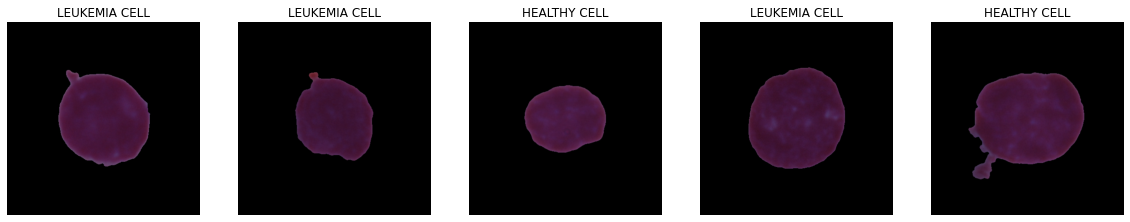

In [ ]:
iv.shuffle_resized_images(shuffle[0], shuffle[1],450,450,n,title_image)

#### Resized images 128x128 

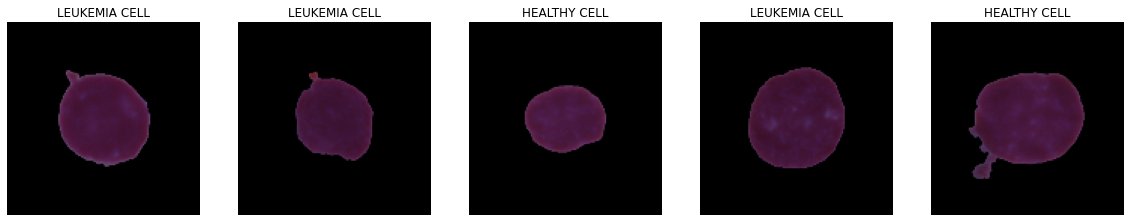

In [ ]:
iv.shuffle_resized_images(shuffle[0], shuffle[1],128,128,n,title_image)

#### Resized images 64x64 

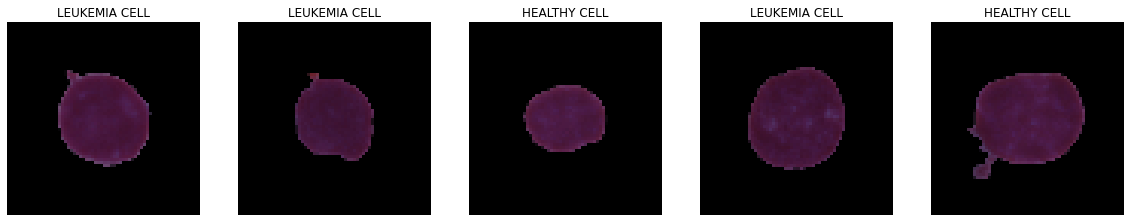

In [ ]:
iv.shuffle_resized_images(shuffle[0], shuffle[1],64,64,n,title_image)

### Conclusion

The original images have size **450x450** pixels. We choose to use **128x128** images to train and validate the Model.

## 2.2 Export Data

### Training Set

In [ ]:
# Training Path
tr_in_path = path_input+TRAIN

#### fold_0

ALL

In [ ]:
# fold_0_ALL=fm.data_manipulation(FOLDERS[0], CELLS[0], tr_in_path, 1, 128,128)

In [ ]:
# Export images
# !cp fold_0_all_images.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'
# Export images
# !cp fold_0_all_labels.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'

HEM

In [ ]:
# fold_0_HEM=fm.data_manipulation(FOLDERS[0], CELLS[1], tr_in_path, 0, 128,128)

In [ ]:
# Export images
# !cp fold_0_hem_images.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'
# Export images
# !cp fold_0_hem_labels.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'

#### fold_1

ALL

In [ ]:
# fold_1_ALL=fm.data_manipulation(FOLDERS[1], CELLS[0], tr_in_path, 1, 128,128)

In [ ]:
# Export images
# !cp fold_1_all_images.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'
# # # Export images
# !cp fold_1_all_labels.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'

HEM

In [ ]:
# fold_1_HEM=fm.data_manipulation(FOLDERS[1], CELLS[1], tr_in_path, 0, 128,128)

In [ ]:
# Export images
# !cp fold_1_hem_images.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'
# # # Export images
# !cp fold_1_hem_labels.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'

#### fold_2

ALL

In [ ]:
# fold_2_ALL=fm.data_manipulation(FOLDERS[2], CELLS[0], tr_in_path, 1, 128,128)

In [ ]:
# Export images
# !cp fold_2_all_images.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'
# # # Export images
# !cp fold_2_all_labels.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'

HEM

In [ ]:
# fold_2_HEM=fm.data_manipulation(FOLDERS[2], CELLS[1], tr_in_path, 0, 128,128)

In [ ]:
# Export images
# !cp fold_2_hem_images.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'
# # # Export images
# !cp fold_2_hem_labels.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/128x128/'

### Validation Set

In [ ]:
# Validation
path_val = path_input+VALIDATION

#### Export Data

- 450x450: val_450_images.npy
- 128x128: val_images.npy

#### 450x450

In [ ]:
# Dimensions
w =450
h = w

In [ ]:
# val=fm.data_manipulation(VALIDATION, 0, path_val, 'NoLabel', w,h)

In [ ]:
# Export images
# !cp val_images.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/validation/'

#### 128x128

In [ ]:
# Dimensions
w =128
h = w

In [ ]:
# val_128=fm.data_manipulation(VALIDATION, 0, path_val, 'NoLabel', w,h)

In [ ]:
# Export images
# !cp val_128_images.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/arrays/validation/'